In [1]:
from extract_helpers_shifted import *
x, y = extract_all()
min = np.min(y)
max = np.max(y)
#y_scale = (y - min) / (max - min)
std = (np.std(y), np.mean(y))
#std = max - min
y_scale = (y - np.mean(y))/np.std(y)

In [2]:
# final trial with full dataset, pooled
pooled_set = \
    [
     "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$","$\mathcal{Bond}_{9}$",
     "$\mathcal{DelocInd_Bond}_{5}$",
     "$\mathcal{DelSqRho}_{1}$",
     "$\mathcal{DelSqV}_{7}$",
     "$\mathcal{ESP}_{1}$","$\mathcal{ESP}_{2}$","$\mathcal{ESP}_{4}$","$\mathcal{ESP}_{5}$","$\mathcal{ESP}_{6}$",
     "$\mathcal{ESPe}_{10}$",
     "$\mathcal{ESPn}_{4}$","$\mathcal{ESPn}_{5}$",
     "$\mathcal{HessRhoEigVals}_{c}(7)$",
     "$\mathcal{K|Scaled|}_{basic}(1)$","$\mathcal{K|Scaled|}_{basic}(2)$",
     "$\mathcal{K|Scaled|}_{basic}(3)$","$\mathcal{K|Scaled|}_{basic}(4)$",
     "$\mathcal{K|Scaled|}_{basic}(6)$",
     "$\mathcal{Kinetic}_{basic}(5)$","$\mathcal{Kinetic}_{basic}(6)$",
     "$\mathcal{Lagr}_{basic}(1)$","$\mathcal{Lagr}_{basic}(5)$","$\mathcal{Lagrangian}_{2}$",
     "$\mathcal{Rho}_{8}$",
     "$\mathcal{Stress_EigVals}_{c}(7)$",
    "$\mathcal{Vnuc}_{1}$","$\mathcal{Vnuc}_{2}$","$\mathcal{Vnuc}_{3}$",
    "$\mathcal{Vnuc}_{4}$","$\mathcal{Vnuc}_{5}$","$\mathcal{Vnuc}_{6}$"
    ]

pool_uncorr = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
        "$\mathcal{DelocInd_Bond}_{5}$",
        "$\mathcal{DelSqRho}_{1}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c}(7)$",
        "$\mathcal{K|Scaled|}_{basic}(1)$", "$\mathcal{K|Scaled|}_{basic}(2)$",
        "$\mathcal{K|Scaled|}_{basic}(3)$", "$\mathcal{K|Scaled|}_{basic}(4)$",
        "$\mathcal{Kinetic}_{basic}(5)$", "$\mathcal{Kinetic}_{basic}(6)$",
        "$\mathcal{Lagr}_{basic}(1)$", "$\mathcal{Lagr}_{basic}(5)$", "$\mathcal{Lagrangian}_{2}$",
        "$\mathcal{Rho}_{8}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$",
        "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$", "$\mathcal{Vnuc}_{6}$"
    ]

# physical set, general model
physical = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$", "$\mathcal{Bond}_{10}$",
        "$\mathcal{DelocInd_Bond}_{5}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{4}$", "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c}(7)$",
        "$\mathcal{K|Scaled|}_{basic}(1)$", "$\mathcal{K|Scaled|}_{basic}(2)$", "$\mathcal{K|Scaled|}_{basic}(3)$",
        "$\mathcal{K|Scaled|}_{basic}(4)$", "$\mathcal{K|Scaled|}_{basic}(5)$", "$\mathcal{K|Scaled|}_{basic}(6)$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$", "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$",
        "$\mathcal{Vnuc}_{6}$"
    ]


In [4]:
import argparse
import multiprocessing as mp

import numpy as np
import seaborn as sns;
from extract_helpers_shifted import *
from feature_sel_util import *
from scoring_functions import *





pool_x_df = x[pooled_set]
phys_x_df = x[physical]
pool_x_uncorr_df = x[pool_uncorr]

#full_input = scale(x)
#pool_x = scale(x[pool])
#phys_x_df = scale(x[physical])
#pool_x_uncorr = scale(x[pool_uncorr])


In [5]:
import pandas as pd
from IPython.display import HTML
HTML(pool_x_df.to_html())


,$\mathcal{Bond}_{7}$,$\mathcal{Bond}_{8}$,$\mathcal{Bond}_{9}$,$\mathcal{DelocInd_Bond}_{5}$,$\mathcal{DelSqRho}_{1}$,$\mathcal{DelSqV}_{7}$,$\mathcal{ESP}_{1}$,$\mathcal{ESP}_{2}$,$\mathcal{ESP}_{4}$,$\mathcal{ESP}_{5}$,$\mathcal{ESP}_{6}$,$\mathcal{ESPe}_{10}$,$\mathcal{ESPn}_{4}$,$\mathcal{ESPn}_{5}$,$\mathcal{HessRhoEigVals}_{c}(7)$,$\mathcal{K|Scaled|}_{basic}(1)$,$\mathcal{K|Scaled|}_{basic}(2)$,$\mathcal{K|Scaled|}_{basic}(3)$,$\mathcal{K|Scaled|}_{basic}(4)$,$\mathcal{K|Scaled|}_{basic}(6)$,$\mathcal{Kinetic}_{basic}(5)$,$\mathcal{Kinetic}_{basic}(6)$,$\mathcal{Lagr}_{basic}(1)$,$\mathcal{Lagr}_{basic}(5)$,$\mathcal{Lagrangian}_{2}$,$\mathcal{Rho}_{8}$,$\mathcal{Stress_EigVals}_{c}(7)$,$\mathcal{Vnuc}_{1}$,$\mathcal{Vnuc}_{2}$,$\mathcal{Vnuc}_{3}$,$\mathcal{Vnuc}_{4}$,$\mathcal{Vnuc}_{5}$,$\mathcal{Vnuc}_{6}$
0,0.209290,0.209301,0.209496,1.933207,-434900.63809,-2.521026e+00,-14.742540,-14.742534,-14.742587,-14.749903,-14.749911,-11.404435,11.502614,8.515524,0.333091,-38.104753,-38.104834,-38.104820,-38.104716,-38.104844,37.719917,37.719882,-3.763800e-06,6.819807e-05,-8.927245e-05,0.311319,0.074538,3.418290e+07,3.406873e+07,3.401621e+07,3.401479e+07,5.736645e+06,5.737112e+06
1,0.158975,0.158981,0.148703,1.929664,-434957.68109,-2.390990e+00,-14.738338,-14.738343,-14.730725,-14.751396,-14.751448,-16.719655,17.106947,10.582710,0.351409,-38.113310,-38.100929,-38.100884,-38.113372,-38.114282,37.735637,37.735681,-1.088456e-04,-2.306534e-05,5.217783e-05,0.299032,0.078344,1.907981e+07,1.910701e+07,1.569244e+08,1.576148e+08,5.869718e+06,5.901901e+06
2,0.148745,0.157639,0.250587,1.928862,-434845.42135,-2.293557e+00,-14.730594,-14.730297,-14.736671,-14.751857,-14.751853,-20.092059,14.432955,11.005845,0.358460,-38.114543,-38.100864,-38.100797,-38.113426,-38.114536,37.735836,37.735921,5.299067e-05,-9.142095e-05,1.225329e-04,0.298734,0.078911,1.598050e+08,2.807705e+08,1.974340e+07,1.145187e+07,5.994293e+06,5.992354e+06
3,0.196997,0.129806,0.197000,1.930878,-435015.73065,-2.539681e+00,-14.740407,-14.732013,-14.740405,-14.753359,-14.753359,-19.215614,19.374845,14.247872,0.344436,-38.123468,-38.110549,-38.110543,-38.123469,-38.110550,37.735397,37.735389,-2.023306e-04,5.881651e-06,-8.815491e-05,0.287795,0.076986,1.020364e+08,1.448165e+07,1.450604e+07,1.024693e+08,5.780314e+06,5.778711e+06
4,0.373172,0.197455,0.129593,1.863503,-435011.56405,-2.750276e+00,-14.754430,-14.754342,-14.729009,-14.728996,-14.737764,-25.415332,20.385087,20.399729,0.262956,-38.109365,-38.097295,-38.097243,-38.109356,-38.111269,37.735964,37.736013,-1.484509e-05,8.822946e-05,-8.647832e-05,0.309744,0.057283,5.811303e+06,5.777622e+06,1.384811e+08,1.441416e+07,1.441095e+07,1.266277e+08
5,0.372140,0.267452,0.267534,1.873835,-435016.54773,-2.750209e+00,-14.751693,-14.751729,-14.735816,-14.735837,-14.736383,-22.479746,16.727823,16.696278,0.263211,-38.124579,-38.111447,-38.111434,-38.124627,-38.111565,37.736397,37.736320,-1.183345e-04,2.996124e-04,-7.207554e-05,0.326029,0.057351,5.857248e+06,5.919623e+06,1.230539e+07,8.120852e+06,8.086222e+06,1.223862e+07
6,0.130340,0.141921,0.266902,1.927748,-434930.19634,-2.209865e+00,-14.736417,-14.738000,-14.729618,-14.748614,-14.748601,-18.968532,20.017338,13.033304,0.360585,-38.109489,-38.097267,-38.097512,-38.110714,-38.111798,37.736613,37.736579,5.789189e-05,8.136739e-05,1.993198e-05,0.293984,0.079160,8.071108e+06,1.203364e+07,1.469782e+07,1.459581e+07,6.162030e+06,6.073499e+06
7,0.120712,0.136798,0.214839,1.930087,-434878.10982,-2.157592e+00,-14.728486,-14.738590,-14.728996,-14.747506,-14.747506,-21.048408,21.938324,15.073925,0.361209,-38.122106,-38.110434,-38.110801,-38.123705,-38.108940,37.736098,37.735656,7.155186e-05,4.260495e-05,5.709200e-05,0.292151,0.079169,1.347808e+07,2.021077e+07,9.663745e+06,9.927352e+06,6.188939e+06,6.179547e+06
8,0.144483,0.276073,0.120154,1.930170,-434926.32699,-2.293663e+00,-14.736089,-14.736759,-14.728052,-14.754394,-14.754324,-19.698427,22.333879,15.178957,0.346373,-38.107189,-38.094686,-38.09468

In [9]:
from extract_helpers import extract_all
from matplotlib import cm

In [4]:
x, y = extract_all()
labels = [i for i in x.columns]
min = np.min(y)
max = np.max(y)
y_scale = (y - min) / (max - min)

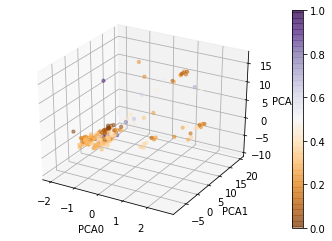

In [17]:
def pca(x, labels=[], barriers = np.array([])):
    #print(np.shape(np.array(x)))
    #print(np.max(barriers))
    #print(np.min(barriers))
    #print(np.argmax(result['PCA0']))
    #print(result["PCA0"][np.argmax(result["PCA0"])])
    #print(np.shape(pc_0))
    #print(result.shape)
    #print(np.shape(pc_0))

    pca = PCA(n_components = 3)
    x = StandardScaler().fit_transform(x)
    pca.fit(x)
    result = pd.DataFrame(pca.transform(x), columns=['PCA%i' % i for i in range(3)])
    barriers = np.delete(barriers, np.argmax(result['PCA0']), 0)
    pc_0 = result['PCA0'].to_numpy()
    pc_1 = result['PCA1'].to_numpy()
    pc_2 = result['PCA2'].to_numpy()
    pc_0 = np.delete(pc_0, np.argmax(result['PCA0']), 0)
    pc_1 = np.delete(pc_1, np.argmax(result['PCA0']), 0)
    pc_2 = np.delete(pc_2, np.argmax(result['PCA0']), 0)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    norm = cm.colors.Normalize(vmin=np.min(barriers), vmax=np.max(barriers))
    cmap = cm.PuOr
    pl = ax.scatter(pc_0, pc_1, pc_2,
                   s= 10,cmap = "PuOr",
                   c=[norm(item) for item in barriers],
               alpha=0.5)
    ax.set_xlabel('PCA0')
    ax.set_ylabel('PCA1')
    ax.set_zlabel('PCA2')
    fig.colorbar(pl)
    plt.show()
pca(x,labels,y)

NameError: name 'pc_0' is not defined

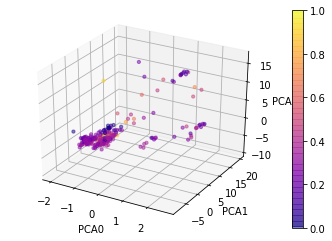

In [32]:


barriers = y
pca = PCA(n_components = 3)
x = StandardScaler().fit_transform(x)
pca.fit(x)
result = pd.DataFrame(pca.transform(x), columns=['PCA%i' % i for i in range(3)])
barriers = np.delete(barriers, np.argmax(result['PCA0']), 0)
pc_0 = result['PCA0'].to_numpy()
pc_1 = result['PCA1'].to_numpy()
pc_2 = result['PCA2'].to_numpy()
pc_0 = np.delete(pc_0, np.argmax(result['PCA0']), 0)
pc_1 = np.delete(pc_1, np.argmax(result['PCA0']), 0)
pc_2 = np.delete(pc_2, np.argmax(result['PCA0']), 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

norm = cm.colors.Normalize(vmin=np.min(barriers), vmax=np.max(barriers))
cmap = cm.PuOr
pl = ax.scatter(pc_0, pc_1, pc_2,
               s= 10,cmap = "plasma",
               c=[norm(item) for item in barriers],
           alpha=0.5)
ax.set_xlabel('PCA0')
ax.set_ylabel('PCA1')
ax.set_zlabel('PCA2')
fig.colorbar(pl)
plt.show()



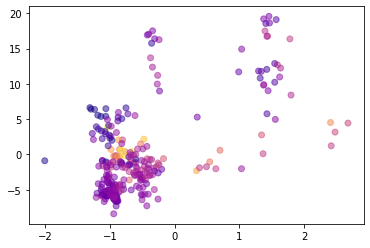

In [31]:
plt.scatter(pc_0,pc_1,cmap = "plasma",
               c=[norm(item) for item in barriers],
           alpha=0.5)

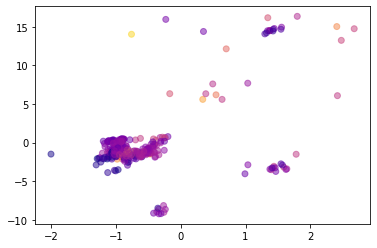

In [30]:
plt.scatter(pc_0,pc_2, cmap = "plasma",
               c=[norm(item) for item in barriers],
           alpha=0.5)

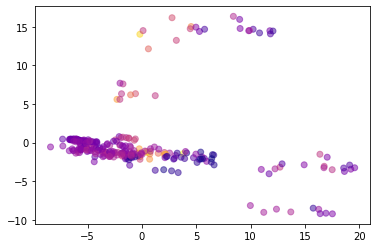

In [29]:
plt.scatter(pc_1,pc_2, cmap = "plasma",
               c=[norm(item) for item in barriers],
           alpha=0.5)

In [1]:
import os 

In [11]:
os.listdir()
file = open('trials_xgb.txt')
for j,i in enumerate(file.readlines()):
    try:
        temp = i.split()
        temp[1].split("=")[-1][0:-1]
    except:
        print(j)

1954
1966
2923
2928
